In [1]:
import requests
import pandas as pd
import json

In [2]:
def getData():
    url='https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5'
    headers={
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36'
    }
    r=requests.get(url,headers)
    if r.status_code==200:
        return json.loads(json.loads(r.text)['data'])

In [3]:
data_dict=getData()

In [5]:
province_list=list()
for province in data_dict.get('areaTree')[0]['children']:
    province_info=province['total']
    province_info['name']=province['name']
    province_list.append(province_info)
province_df=pd.DataFrame(province_list)

In [6]:
province_df=province_df.select_dtypes(exclude=['bool'])

In [8]:
province_name=province_df.name.tolist()

In [7]:
province_nowConfirm=province_df.nowConfirm.tolist()

In [9]:
from pyecharts.charts import Map
from pyecharts import options as opts

In [10]:
china_map=Map()
pieces = [
    {'min':1,'max':9,'color':'#FFE0E0'},
    {'min':10,'max':99,'color':'#FFC0C0'},
    {'min':100,'max':499,'color':'#FF9090'},
    {'min':500,'max':999,'color':'#FF6060'},
    {'min':1000,'max':9999,'color':'#FF3030'},
    {'min':10000,'color':'#DD0000'},
    
]

D:\Anocanda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [12]:
china_map.add('全国疫情分布',[list(tup) for tup in zip(province_name,province_nowConfirm)],'china')
china_map.set_global_opts(title_opts=opts.TitleOpts(title='中国加油'),visualmap_opts=opts.VisualMapOpts(is_piecewise=True,pieces=pieces))
china_map.render()

'D:\\PYTHON-L\\code\\render.html'

In [12]:
"全国疫情曲线"
import time
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [13]:
url='https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_cn_day_counts&callback=&_=%d'%int(time.time()*1000)

In [14]:
data=json.loads(requests.get(url=url).json()['data'])
data.sort(key=lambda x:x['date'])

In [15]:
date_list=list()
confirm_list=list()
suspect_list=list()
dead_list=list()
heal_list=list()
for item in data:
    month,day=item['date'].split('/')
    date_list.append(datetime.strptime('2020-%s-%s'% (month,day),'%Y-%m-%d'))
    confirm_list.append(int(item['confirm']))
    suspect_list.append(int(item['suspect']))
    dead_list.append(int(item['dead']))
    heal_list.append(int(item['heal']))

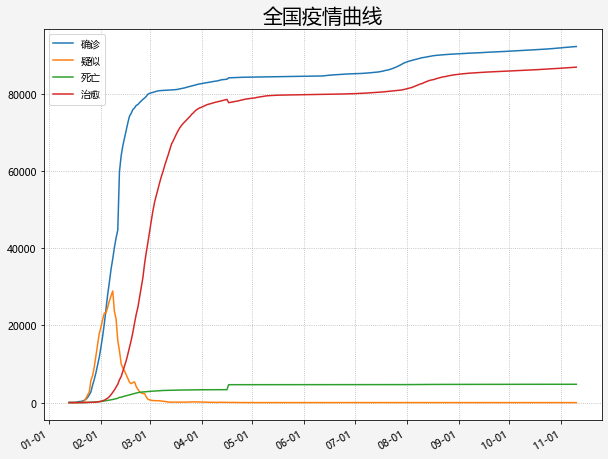

In [16]:
plt.figure('全国疫情统计图表', facecolor='#f4f4f4', figsize=(10, 8))
plt.title('全国疫情曲线', fontsize=20)

plt.plot(date_list, confirm_list, label='确诊')
plt.plot(date_list, suspect_list, label='疑似')
plt.plot(date_list, dead_list, label='死亡')
plt.plot(date_list, heal_list, label='治愈')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # 格式化时间轴标注
plt.gcf().autofmt_xdate()  # 优化标注（自动倾斜）
plt.grid(linestyle=':')  # 显示网格
plt.legend(loc='best')  # 显示图例
plt.savefig('全国疫情曲线.png')  # 保存为文件
plt.show()